In [2]:
import pandas as pd
df=pd.read_csv("dataset_clean.csv")
df

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Jenis_Kelamin,Diterima
0,17,96.33,4,L,1
1,18,69.58,3,L,0
2,15,65.80,5,P,0
3,17,79.58,2,L,0
4,17,99.43,1,P,0
...,...,...,...,...,...
295,18,97.89,5,P,1
296,16,99.44,1,L,0
297,17,90.14,5,L,1
298,15,75.05,3,L,0


In [3]:
df.head()

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Jenis_Kelamin,Diterima
0,17,96.33,4,L,1
1,18,69.58,3,L,0
2,15,65.80,5,P,0
3,17,79.58,2,L,0
4,17,99.43,1,P,0


In [4]:
df.tail()

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Jenis_Kelamin,Diterima
295,18,97.89,5,P,1
296,16,99.44,1,L,0
297,17,90.14,5,L,1
298,15,75.05,3,L,0
299,18,63.34,0,P,0


In [5]:
df.dtypes

Usia                           int64
Nilai_Rerata                 float64
Aktivitas_Ekstrakurikuler      int64
Jenis_Kelamin                 object
Diterima                       int64
dtype: object

In [6]:
df.columns

Index(['Usia', 'Nilai_Rerata', 'Aktivitas_Ekstrakurikuler', 'Jenis_Kelamin',
       'Diterima'],
      dtype='object')

In [7]:
df.sample(5, random_state=42)

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Jenis_Kelamin,Diterima
203,15,66.52,3,P,0
266,18,71.73,4,P,0
152,15,81.63,1,P,0
9,16,89.13,4,P,1
233,18,95.10,1,L,0


In [8]:
df.describe()

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Diterima
count,300.00000,300.000000,300.000000,300.000000
mean,16.55000,80.273233,2.486667,0.320000
std,1.13363,11.844692,1.743547,0.467256
min,15.00000,60.200000,0.000000,0.000000
25%,16.00000,69.872500,1.000000,0.000000
50%,17.00000,81.530000,2.000000,0.000000
75%,18.00000,90.150000,4.000000,1.000000
max,18.00000,99.620000,5.000000,1.000000


In [9]:
df.isna()

,Usia,Nilai_Rerata,Aktivitas_Ekstrakurikuler,Jenis_Kelamin,Diterima
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
295,False,False,False,False,False
296,False,False,False,False,False
297,False,False,False,False,False
298,False,False,False,False,False


In [10]:
df.sum()

Usia                                                                      4965
Nilai_Rerata                                                          24081.97
Aktivitas_Ekstrakurikuler                                                  746
Jenis_Kelamin                LLPLPPLLLPLPLPPLPPLPLPLLPPPPPLPLLPLLLLPLPPLPPP...
Diterima                                                                    96
dtype: object

In [11]:
df["Usia"].value_counts()

Usia
18    81
17    77
15    74
16    68
Name: count, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['Usia', 'Nilai_Rerata', 'Aktivitas_Ekstrakurikuler', 'Jenis_Kelamin']]
y = df['Diterima']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42
)


numeric_column = ['Usia', 'Nilai_Rerata', 'Aktivitas_Ekstrakurikuler']
categorical_column = ['Jenis_Kelamin']


preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_column),
        ("Ohe", OneHotEncoder(), categorical_column)
    ]
)

model_forest = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model_forest", RandomForestClassifier())
    ]
)

model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

print("accuracy: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))
print("confusion matrix: ", confusion_matrix(y_pred, y_test))

accuracy:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

confusion matrix:  [[39  0]
 [ 0 21]]


In [13]:
df.columns

Index(['Usia', 'Nilai_Rerata', 'Aktivitas_Ekstrakurikuler', 'Jenis_Kelamin',
       'Diterima'],
      dtype='object')

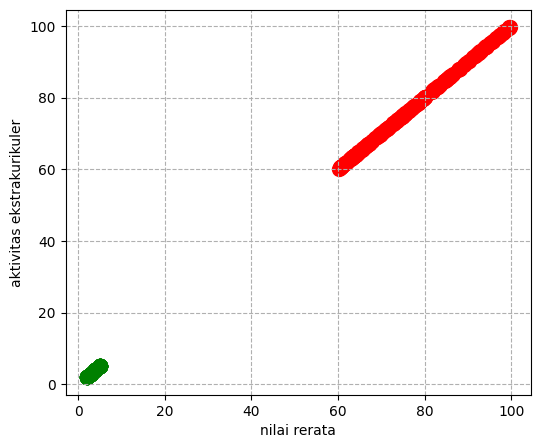

In [14]:
import matplotlib.pyplot as plt

tidak = df[df["Diterima"]==0]
ya = df[df["Diterima"]==1]

plt.figure(figsize=(6,5))
plt.scatter(tidak["Nilai_Rerata"], tidak["Nilai_Rerata"], s=100, color="red", label="0")
plt.scatter(ya["Aktivitas_Ekstrakurikuler"], ya["Aktivitas_Ekstrakurikuler"], s=100, color="green", label="1")
plt.xlabel("nilai rerata")
plt.ylabel("aktivitas ekstrakurikuler")
plt.grid(True, linestyle="--")
plt.show()

In [15]:
data_baru = pd.DataFrame([[15,65.8,5,"P"]],
                         columns=['Usia', 'Nilai_Rerata', 'Aktivitas_Ekstrakurikuler', 'Jenis_Kelamin'])
prediksi = model_forest.predict(data_baru)[0]
presentase = max(model_forest.predict_proba(data_baru)[0])
print(f"model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

model memprediksi 0 dengan tingkat keyakinan 100.00%


In [16]:
import joblib

joblib.dump(model_forest, "model")


['model']

In [17]:
['model']

['model']